In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
x=dataset.iloc[:,[3,4]].values

In [5]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [6]:
from sklearn.cluster import BisectingKMeans

bkm = BisectingKMeans(random_state=42, max_iter=300)
y_bkm = bkm.fit_predict(x)  # This assigns cluster labels

# Use y_bkm instead of calling the model again
labels = y_bkm  
print(labels)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 0 3 4 3 4 4 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 7 1 7 0 7 1 7 1 7 1 7 0 7 1 7 1 7 0 7 0 7 0 7 1
 7 0 7 0 7 1 7 0 7 1 7 1 7 0 7 0 7 1 7 0 7 1 7 1 7 0 7 0 7 1 6 0 6 0 6 0 6
 0 6 5 6 0 6 5 6 5 6 5 5 5 5 5]


In [7]:
num_clusters = 4

In [8]:
labels = bkm.fit_predict(x) 

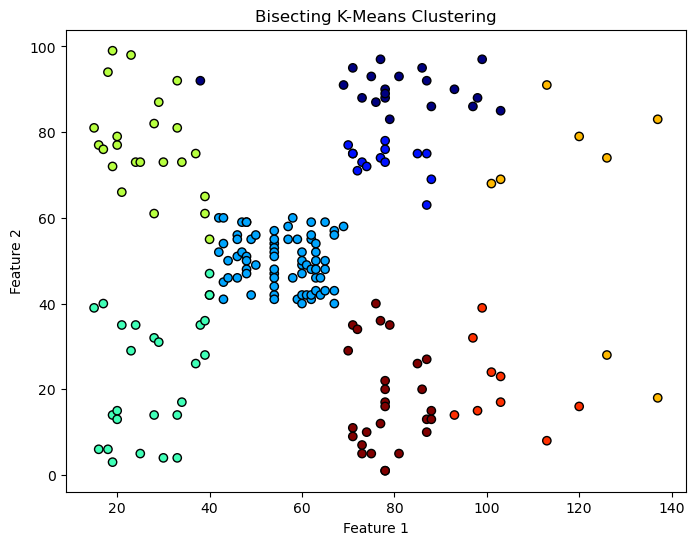

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='jet', edgecolors='k')
plt.title("Bisecting K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [36]:
num_clusters = len(np.unique(labels))  # labels is the output from .fit_predict()
print("Number of clusters:", num_clusters)

Number of clusters: 8


In [38]:
supervised=dataset

In [40]:
supervised['cluster_groups']=y_bkm

In [42]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_groups
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,5
196,197,Female,45,126,28,5
197,198,Male,32,126,74,5
198,199,Male,32,137,18,5


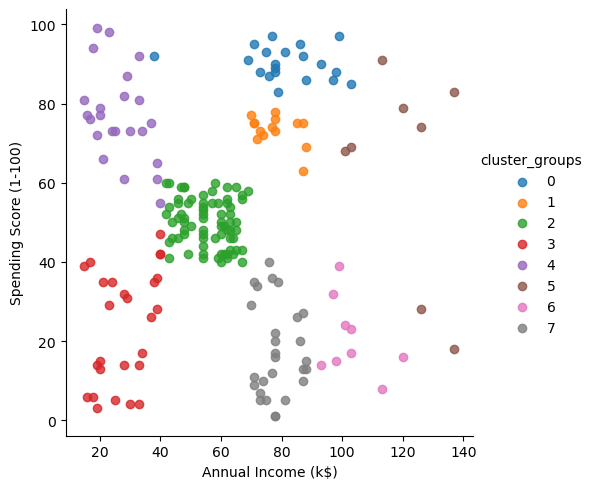

In [44]:
import seaborn as sns
facet=sns.lmplot(data=supervised,x=supervised.columns[3],y=supervised.columns[4],
                 hue=supervised.columns[5],fit_reg=False,legend=True,legend_out=True)